# Pandas Group By:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Pokemon.csv")
df

,Num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
147,148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


In [3]:
df = df[['Name','Type 1','Type 2','Total','HP','Attack']]

In [4]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack
0,Bulbasaur,Grass,Poison,318,45,49
1,Ivysaur,Grass,Poison,405,60,62
2,Venusaur,Grass,Poison,525,80,82
3,Charmander,Fire,NaN,309,39,52
4,Charmeleon,Fire,NaN,405,58,64


In [5]:
gpp = df.groupby("Type 1")

## Viewing Each Group & 'Indexes' Individually

In [6]:
gpp.groups

{'Bug': [9, 10, 11, 12, 13, 14, 45, 46, 47, 48, 122, 126], 'Dragon': [146, 147, 148], 'Electric': [24, 25, 80, 81, 99, 100, 124, 134, 144], 'Fairy': [34, 35], 'Fighting': [55, 56, 65, 66, 67, 105, 106], 'Fire': [3, 4, 5, 36, 37, 57, 58, 76, 77, 125, 135, 145], 'Ghost': [91, 92, 93], 'Grass': [0, 1, 2, 42, 43, 44, 68, 69, 70, 101, 102, 113], 'Ground': [26, 27, 49, 50, 103, 104, 110, 111], 'Ice': [123, 143], 'Normal': [15, 16, 17, 18, 19, 20, 21, 38, 39, 51, 52, 82, 83, 84, 107, 112, 114, 127, 131, 132, 136, 142], 'Poison': [22, 23, 28, 29, 30, 31, 32, 33, 40, 41, 87, 88, 108, 109], 'Psychic': [62, 63, 64, 95, 96, 121, 149, 150], 'Rock': [73, 74, 75, 94, 137, 138, 139, 140, 141], 'Water': [6, 7, 8, 53, 54, 59, 60, 61, 71, 72, 78, 79, 85, 86, 89, 90, 97, 98, 115, 116, 117, 118, 119, 120, 128, 129, 130, 133]}

In [7]:
gpp.ngroups

15

In [8]:
gpp.get_group("Grass")

,Name,Type 1,Type 2,Total,HP,Attack
0,Bulbasaur,Grass,Poison,318,45,49
1,Ivysaur,Grass,Poison,405,60,62
2,Venusaur,Grass,Poison,525,80,82
42,Oddish,Grass,Poison,320,45,50
43,Gloom,Grass,Poison,395,60,65
44,Vileplume,Grass,Poison,490,75,80
68,Bellsprout,Grass,Poison,300,50,75
69,Weepinbell,Grass,Poison,390,65,90
70,Victreebel,Grass,Poison,490,80,105
101,Exeggcute,Grass,Psychic,325,60,40


## Applying loops to view Each Group and their values

In [9]:
for name,group in gpp:
    print(name)
    print("="*20)
    print(group)
    print()

Bug
           Name Type 1  Type 2  Total  HP  Attack
9      Caterpie    Bug     NaN    195  45      30
10      Metapod    Bug     NaN    205  50      20
11   Butterfree    Bug  Flying    395  60      45
12       Weedle    Bug  Poison    195  40      35
13       Kakuna    Bug  Poison    205  45      25
14     Beedrill    Bug  Poison    395  65      90
45        Paras    Bug   Grass    285  35      70
46     Parasect    Bug   Grass    405  60      95
47      Venonat    Bug  Poison    305  60      55
48     Venomoth    Bug  Poison    450  70      65
122     Scyther    Bug  Flying    500  70     110
126      Pinsir    Bug     NaN    500  65     125

Dragon
          Name  Type 1  Type 2  Total  HP  Attack
146    Dratini  Dragon     NaN    300  41      64
147  Dragonair  Dragon     NaN    420  61      84
148  Dragonite  Dragon  Flying    600  91     134

Electric
           Name    Type 1  Type 2  Total  HP  Attack
24      Pikachu  Electric     NaN    320  35      55
25       Raichu  Elect

In [10]:
gpp["HP"].mean()

Type 1
Bug         55.416667
Dragon      64.333333
Electric    54.444444
Fairy       82.500000
Fighting    63.571429
Fire        63.833333
Ghost       45.000000
Grass       65.000000
Ground      58.125000
Ice         77.500000
Normal      78.681818
Poison      64.500000
Psychic     63.875000
Rock        53.888889
Water       64.535714
Name: HP, dtype: float64

## Plotting by Group

<Axes: xlabel='HP', ylabel='Type 1'>

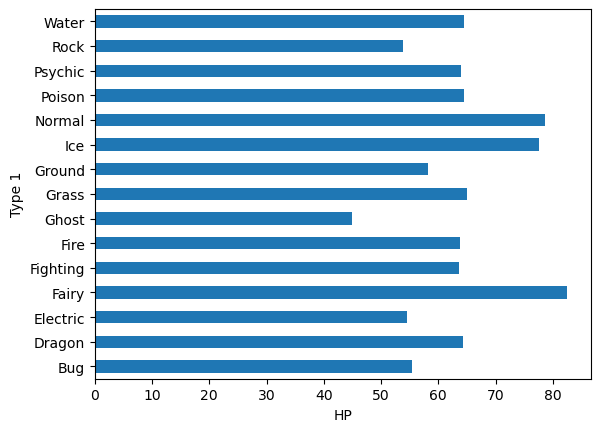

In [12]:
gpp["HP"].mean().plot(kind="barh",xlabel="HP")

### Using Aggregate to perform functions on multiple columns

In [13]:
df.groupby("Type 1").agg({"HP":["min","max"], "Attack":["min","max"],"Total":"mean"})

HP      Attack            Total
         min  max    min  max        mean
Type 1                                   
Bug       35   70     20  125  336.250000
Dragon    41   91     64  134  440.000000
Electric  25   90     30   90  444.444444
Fairy     70   95     45   70  403.000000
Fighting  40   90     80  130  412.142857
Fire      38   90     41  130  455.583333
Ghost     30   60     35   65  405.000000
Grass     45   95     40  105  409.416667
Ground    10  105     50  130  374.375000
Ice       65   90     50   85  517.500000
Normal    30  250      5  110  380.409091
Poison    35  105     45  105  383.500000
Psychic   25  106     20  110  470.125000
Rock      30   80     40  120  420.555556
Water     20  130     10  130  411.214286

In [14]:
df.groupby("Type 1")["HP"].agg({"max","min"})

,max,min
Type 1,,
Bug,70,35
Dragon,91,41
Electric,90,25
Fairy,95,70
Fighting,90,40
Fire,90,38
Ghost,60,30
Grass,95,45
Ground,105,10


In [79]:
def range(x):
    return x.max() - x.min()

In [80]:
df.groupby("Type 1")["HP"].agg(["max","min",range])

,max,min,range
Type 1,,,
Bug,70,35,35
Dragon,91,41,50
Electric,90,25,65
Fairy,95,70,25
Fighting,90,40,50
Fire,90,38,52
Ghost,60,30,30
Grass,95,45,50
Ground,105,10,95


## Total no of null Values:

In [85]:
df["Type 2"].size - df["Type 1"].count() 

0

### defining custom function to calulate null values

In [99]:
def null_count(s):
    return s.size-s.count()

In [100]:
df.groupby("Type 1")["Type 2"].agg(null_count)

Type 1
Bug          3
Dragon       2
Electric     6
Fairy        2
Fighting     7
Fire        10
Ghost        0
Grass        1
Ground       6
Ice          0
Normal      12
Poison      10
Psychic      7
Rock         0
Water       18
Name: Type 2, dtype: int64

## Named Aggregation:

            > We can provide custom names to our aggregate functions.
            such as max --> custom_max   min --> custom_min

In [106]:
df = pd.read_csv("Pokemon.csv")
df = df[["Name","Type 1","Type 2","Total","HP","Attack","Defense","Speed"]]

In [107]:
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Speed
0,Bulbasaur,Grass,Poison,318,45,49,49,45
1,Ivysaur,Grass,Poison,405,60,62,63,60
2,Venusaur,Grass,Poison,525,80,82,83,80
3,Charmander,Fire,NaN,309,39,52,43,65
4,Charmeleon,Fire,NaN,405,58,64,58,80
...,...,...,...,...,...,...,...,...
146,Dratini,Dragon,NaN,300,41,64,45,50
147,Dragonair,Dragon,NaN,420,61,84,65,70
148,Dragonite,Dragon,Flying,600,91,134,95,80
149,Mewtwo,Psychic,NaN,680,106,110,90,130


In [108]:
df.groupby("Type 1").agg(
    max_speed=("Speed","max"),
    min_speed=("Speed","min"),
    avg_HP=("HP","mean"),
    max_HP=("HP","max"),
    min_HP=("HP","min")
)

,max_speed,min_speed,avg_HP,max_HP,min_HP
Type 1,,,,,
Bug,105,25,55.416667,70,35
Dragon,80,50,64.333333,91,41
Electric,140,45,54.444444,90,25
Fairy,60,35,82.500000,95,70
Fighting,95,35,63.571429,90,40
Fire,105,60,63.833333,90,38
Ghost,110,80,45.000000,60,30
Grass,80,30,65.000000,95,45
Ground,120,25,58.125000,105,10
